# kickstarter_analytics
Exploration &amp; analytics of Kickstarter data from Kaggle

## Brief contents
### 0. Introduction
* 0.1 How Kickstarter works
* 0.2 Summary of the data
* 0.3 Import packages

### 1. Genaral
* 1.1 Handling weird values
* 1.2 Modify data columns
* 1.3 Numbers of projects proposed/ successful rate
* 1.4 Statistics of pledged amount

### 2. Region
* 2.1 Projects proposed across regions

### 3. Caterogy
* 3.1 Projects proposed across categories
* 3.2 Pledged amount across categories
* 3.3 Success rate across categories

### 4. Backers
* 4.1 Discover categories that attract most backers
* 4.2 The distribution of backers
* 4.3 Relationship between backers & pledged amounts

### 5. Modeling
* 5.1 Pledged amount prediction - Linear Regression
* 5.2 Project state prediction - Random Forest


----
## 0. Introduction
#### 0.1  About Kickstarter (https://www.kickstarter.com/)

Launched in 2009, Kickstarter has now became a world famous online crowdfunding platform. The platform mainly focus on creativity and merchandising, which has made some of the most fantastic ideas to come true.

The crowdfunding process is simple:
* Project owners propose their projects and provide related information such as idea, pricing, schedule, etc. 
* Backers back the projects that seems attractive

The purpose of this kernel is to  explore the data collected from Kickstarter, trying to understand some characteristics of the platform.

**source:** https://www.kaggle.com/kemical/kickstarter-projects

#### 0.2 Summary of the data (https://www.kaggle.com/kemical/kickstarter-projects/data)
We have 2 data files in this event:
1. ks-projects-201612.csv
2. ks-projects-201801.csv 

The `ks-projects-201612` data file is contained by the `ks-projects-201801`. We will use the  `ks-projects-201801` for further exploration.

Some characteristic of this dataset:
- 378661 rows, 15 columns
- Metadata

|              | `Description`  |	`Attribute`  |
|------------|----------------|----------------|
| `ID`         |internal id      | Numeric |
| `name`  | name of the project | String |
| `category` | sub category (159) | String |
| `main_category`| main category (15) | String |
| `currency` | currency defined by project owner | String |
| `dealine` | deadline | DateTime|
| `goal` | fundraising goal | Numeric|
| `launched` | launched time | DateTime|
| `pledged` | the pledged amount | Numeric |
| `state` | state of the project (successful, failed, etc.) | String|
| `backers` | number of backers | Numeric |
| `country` | country | String |
| `usd_pledged` | pledged amount in USD | Numeric |
| `usd_pledged real` | pledged amount in USD | Numeric |
| `usd_ goal_real` | pledged goal in USD | Numeric |

#### 0.3 Import packages

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import GridSearchCV
import time
import os

## 1. General

#### 1.1 Handling weird values
- Check ourliers
- Check missing values

In [2]:
ksdf = pd.read_csv('/Users/Terry/Desktop/CodingDog/kickstarter/kickstarter_data/ks-projects-201801.csv', sep=',', engine='python')
ksdf.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [3]:
ksdf.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [4]:
ksdf.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

According to the description of data:
- **usd pledged**: USD conversion made by Kickstarter for the pledged value
- **usd_pledged_real**:  USD conversion made by fixer.io api

We will use **usd_pledged_real** for further analysis

In [5]:
# Check missing values in the column "name"
ksdf[pd.isnull(ksdf['name'])].index

Int64Index([166851, 307234, 309991, 338931], dtype='int64')

In [6]:
ksdf[ksdf.index == 166851]
ksdf[ksdf.index == 307234]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
307234,634871725,NaN,Video Games,Games,GBP,2013-01-06,2000.0,2012-12-19 23:57:48,196.0,failed,12,GB,317.73,316.05,3224.97


Even though there are some missing values in **name**, those are real projects. So I will keep them.

#### 1.2 Modify data columns
- According to previous cell, I will drop **usd pledged** columns
- Add **pledged_ratio** column that follows the rule:
 > pledged_ratio = usd_pledged_real/ usd_goal_real
- Retrieve **year** & **date** and transform the information as a new column **time** that follows the rule:
> `(year - 2009) * 12 + month`
>>Since 2009 seems to be the first year that contains meaningful data, we will use this alorithm to get timely manner information
- Generate a new dataframe **ksdf_year** for cross-year comparison

In [7]:
# Delete usdf pledged column
ksdf.drop(['usd pledged'], axis = 1, inplace = True)

# Add pledged_ratio column
ksdf['pledged_ratio'] = ksdf['usd_pledged_real']/ ksdf['usd_goal_real']

In [8]:
def year_cut(string):
    return string[0:4]

def month_cut(string):
    return string[5:7]

ksdf['year'] = ksdf['launched'].apply(year_cut)
ksdf['month'] = ksdf['launched'].apply(month_cut)

ksdf['year'] = ksdf['year'].astype(int)
ksdf['month'] = ksdf['month'].astype(int)
ksdf['time'] = (ksdf['year'].values - 2009)*12 + (ksdf['month']).astype(int)

In [9]:
ksdf['year'].value_counts()

2015    77300
2014    67745
2016    57184
2017    52200
2013    44851
2012    41165
2011    26237
2010    10519
2009     1329
2018      124
1970        7
Name: year, dtype: int64

In [10]:
ksdf_year = {}
for year in range(2009, 2019):
    ksdf_year[year] = ksdf[ksdf['year'] == year]['year'].count()

ksdf_year = pd.Series(ksdf_year)
ksdf_year = pd.DataFrame(ksdf_year)
ksdf_year = ksdf_year.rename(columns = {0: "counts"})
ksdf_year

,counts
2009,1329
2010,10519
2011,26237
2012,41165
2013,44851
2014,67745
2015,77300
2016,57184
2017,52200
2018,124


#### 1.3 Number of projects proposed/  successful rate
- Overall number of proposed projects
- Overall successful rate
- Cross year comparison of above 2 items

In [11]:
ksdf['state'].value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

In [12]:
success_timely = []

for year in range(2009, 2019):
    success = len (ksdf[(ksdf['year'] == year) & (ksdf['state'] == 'successful')]['state'])
    overall = len (ksdf[ksdf['year'] == year]['year'])
    ratio = success/ overall
    success_timely.append(ratio)
    print ("Year = ",year, ratio * 100, '%')

Year =  2009 43.566591422121896 %
Year =  2010 43.66384637322939 %
Year =  2011 46.38868773106681 %
Year =  2012 43.46410785861776 %
Year =  2013 43.28777507747876 %
Year =  2014 31.156542918296555 %
Year =  2015 27.129366106080205 %
Year =  2016 32.81687185226637 %
Year =  2017 35.367816091954026 %
Year =  2018 0.0 %


In [13]:
ksdf[ksdf['year'] == 2018]['state'].value_counts()

live        122
canceled      2
Name: state, dtype: int64

In [14]:
ksdf_year['success_ratio'] = success_timely
ksdf_year.head

<bound method NDFrame.head of       counts  success_ratio
2009    1329       0.435666
2010   10519       0.436638
2011   26237       0.463887
2012   41165       0.434641
2013   44851       0.432878
2014   67745       0.311565
2015   77300       0.271294
2016   57184       0.328169
2017   52200       0.353678
2018     124       0.000000>

In [15]:
ksdf[ksdf['year'] == 2017]['backers'].count()

52200

In [16]:
backers_year = {}
for year in range(2009, 2019):
    backers_count = ksdf[ksdf['year'] == year]['backers'].sum()
    backers_year[year] = backers_count

ksdf_year['backers'] = pd.Series(backers_year)

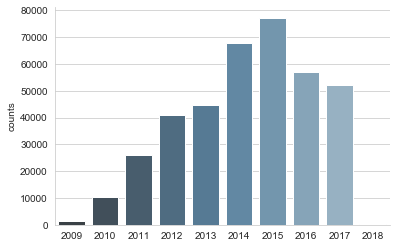

In [17]:
# Cross-year proposed projects
sns.set_style("whitegrid")
sns.barplot(ksdf_year['counts'].index, y= ksdf_year['counts'] ,
            palette="Blues_d", saturation = 0.5)
sns.despine(right = True, top = True)

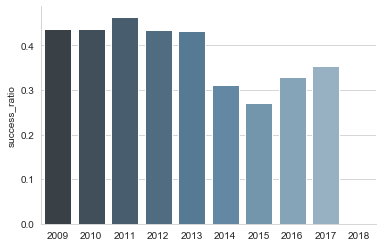

In [18]:
# Cross-year success ratio
sns.set_style("whitegrid")
sns.barplot(ksdf_year['success_ratio'].index, y= ksdf_year['success_ratio'], data = ksdf_year,
            palette="Blues_d", saturation = 0.5)
sns.despine(right = True, top = True)

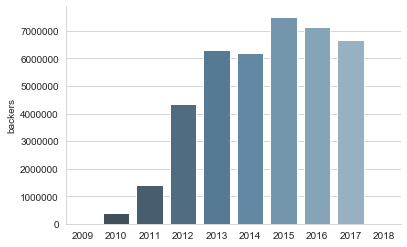

In [19]:
sns.set_style("whitegrid")
sns.barplot(ksdf_year['backers'].index, y= ksdf_year['backers'] ,
            palette="Blues_d", saturation = 0.5)
sns.despine(right = True, top = True)

#### 1.4 Statistics of pledged amount
- Descripitive statistics of pledged amount
- Pledged amount comparison by state (successful/ failed/ others)

In [20]:
sum_pledged = ksdf['usd_pledged_real'].sum()
print (sum_pledged)

3430261248.830001


In [21]:
ksdf['usd_pledged_real'].describe()

count    3.786610e+05
mean     9.058924e+03
std      9.097334e+04
min      0.000000e+00
25%      3.100000e+01
50%      6.243300e+02
75%      4.050000e+03
max      2.033899e+07
Name: usd_pledged_real, dtype: float64

In [22]:
# Ratio of successful/ failed / others
success_pledged = ksdf[ksdf['state'] == "successful"]['usd_pledged_real'].sum()
fail_pledged = ksdf[ksdf['state'] == 'failed']['usd_pledged_real'].sum()
others_pledged = (ksdf[ksdf['state'] == 'canceled']['usd_pledged_real'].sum() +
                  ksdf[ksdf['state'] == 'undefined']['usd_pledged_real'].sum() +
                  ksdf[ksdf['state'] == 'live']['usd_pledged_real'].sum() +
                  ksdf[ksdf['state'] == 'suspended']['usd_pledged_real'].sum())

print (success_pledged, success_pledged/ sum_pledged * 100, '%')
print (fail_pledged, fail_pledged/ sum_pledged * 100, '%')
print (others_pledged, others_pledged/ sum_pledged * 100, '%')

3036889045.99 88.53229610502194 %
261108466.04999995 7.611911953909028 %
132263736.78999999 3.855791941068999 %


In [23]:
success_projects = ksdf[ksdf['state'] == 'successful']['state'].count()
fail_projects  = ksdf[ksdf['state'] == 'failed']['state'].count()
others_projects  = (
    ksdf[ksdf['state'] == 'canceled']['state'].count() +
    ksdf[ksdf['state'] == 'live']['state'].count() +
    ksdf[ksdf['state'] == 'undefined']['state'].count() +
    ksdf[ksdf['state'] == 'suspended']['state'].count())

print ("Average pledged amount per successful project = ",success_pledged/success_projects)
print ("Average pledged amount per failed project = ",fail_pledged/ fail_projects)
print ("Average pledged amount per other project = ",others_pledged/ others_projects)

Average pledged amount per successful project =  22670.795231195316
Average pledged amount per failed project =  1320.60381678038
Average pledged amount per other project =  2814.9605582513936


In [24]:
22670.7952312/1320.6038

17.166992273685718

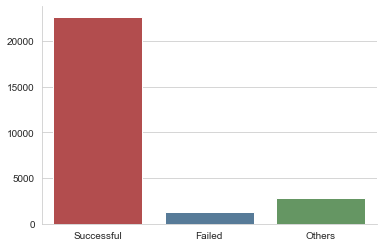

In [25]:
sns.set_style("whitegrid")
sns.barplot(["Successful", "Failed", "Others"],
            y= [22670.7952312, 1320.60381678, 2814.96055825],
            palette = "Set1",
            saturation = 0.5)
sns.despine(right = True, top = True)

## 2. Region
- 2.1 Projects proposed across regions

In [26]:
ksdf['country'].unique()

array(['GB', 'US', 'CA', 'AU', 'NO', 'IT', 'DE', 'IE', 'MX', 'ES', 'N,0"',
       'SE', 'FR', 'NL', 'NZ', 'CH', 'AT', 'DK', 'BE', 'HK', 'LU', 'SG',
       'JP'], dtype=object)

In [27]:
ksdf['country'].value_counts()

US      292627
GB       33672
CA       14756
AU        7839
DE        4171
N,0"      3797
FR        2939
IT        2878
NL        2868
ES        2276
SE        1757
MX        1752
NZ        1447
DK        1113
IE         811
CH         761
NO         708
HK         618
BE         617
AT         597
SG         555
LU          62
JP          40
Name: country, dtype: int64

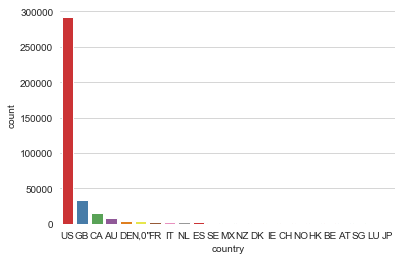

In [28]:
sns.countplot(ksdf['country'], palette = 'Set1', order = ksdf['country'].value_counts().index)
sns.despine(bottom = True, left = True)

In [29]:
us = ksdf[ksdf['country'] == "US"]['country'].count()
print (us/len(ksdf['country']) * 100, "%")

77.27941351235009 %



## 3. Caterogy
* 3.1 Projects proposed across categories
* 3.2 Pledged amount across categories
* 3.3 Success rate across categories

We will go through this part by creating a new dataframe **cate_df** to record some information, including:
- **pledged_sum** -> Sum of the pledged money for each categories
- **count** -> Project counts for each categories
- **average_amount** -> Average pledged amount for each categories 
- **success_count** -> Successful projects counts for each categories
- **success_rate** -> The ratio of success for each categories

Adding **pledged_sum**

In [30]:
pledged_sum = {}
for category in list(set(ksdf['main_category'])):
    amount = ksdf[ksdf['main_category'] == category]['usd_pledged_real'].sum()
    pledged_sum[category] = amount

# Create dataframe
cate_df = pd.Series(pledged_sum)
cate_df = pd.DataFrame(cate_df)
cate_df = cate_df.rename(columns = {0:"pledged_sum"})

cate_df.head()

,pledged_sum
Music,2.003187e+08
Dance,1.301070e+07
Crafts,1.438428e+07
Journalism,1.243767e+07
Film & Video,3.915551e+08


Adding **count**

In [31]:
cate_count = {}
for category in list(set(ksdf['main_category'])):
    count = ksdf[ksdf['main_category'] == category]['main_category'].count()
    cate_count[category] = count
    
cate_df['count'] = pd.Series(cate_count)

cate_df.head()

,pledged_sum,count
Music,2.003187e+08,51918
Dance,1.301070e+07,3768
Crafts,1.438428e+07,8809
Journalism,1.243767e+07,4755
Film & Video,3.915551e+08,63585


Adding **average_amount**

In [32]:
cate_df['average_amount'] = cate_df['pledged_sum']/ cate_df['count']
cate_df.head()

,pledged_sum,count,average_amount
Music,2.003187e+08,51918,3858.367608
Dance,1.301070e+07,3768,3452.946356
Crafts,1.438428e+07,8809,1632.907282
Journalism,1.243767e+07,4755,2615.702568
Film & Video,3.915551e+08,63585,6157.978427


Adding **success_rate**

In [33]:
success = {}
for category in list(set(ksdf['main_category'])):
    success_count = len(ksdf[(ksdf['main_category'] == category) & 
         (ksdf['state'] == "successful")])
    success[category] = success_count

cate_df["success_count"] = pd.Series(success)
cate_df.head()

,pledged_sum,count,average_amount,success_count
Music,2.003187e+08,51918,3858.367608,24197
Dance,1.301070e+07,3768,3452.946356,2338
Crafts,1.438428e+07,8809,1632.907282,2115
Journalism,1.243767e+07,4755,2615.702568,1012
Film & Video,3.915551e+08,63585,6157.978427,23623


In [34]:
cate_df.sort_values('pledged_sum', ascending = False)

,pledged_sum,count,average_amount,success_count
Games,7.413273e+08,35231,21041.903140,12518
Design,7.342202e+08,30070,24417.034698,10550
Technology,6.888725e+08,32569,21151.171165,6434
Film & Video,3.915551e+08,63585,6157.978427,23623
Music,2.003187e+08,51918,3858.367608,24197
Publishing,1.335760e+08,39874,3349.951931,12300
Fashion,1.303353e+08,22816,5712.450839,5593
Food,1.258065e+08,24602,5113.669716,6085
Art,9.068045e+07,28153,3220.986968,11510
Comics,7.151839e+07,10819,6610.443828,5842


In [35]:
cate_df["success_rate"] = cate_df['success_count']/ cate_df['count']
cate_df.head()

,pledged_sum,count,average_amount,success_count,success_rate
Music,2.003187e+08,51918,3858.367608,24197,0.466062
Dance,1.301070e+07,3768,3452.946356,2338,0.620488
Crafts,1.438428e+07,8809,1632.907282,2115,0.240095
Journalism,1.243767e+07,4755,2615.702568,1012,0.212829
Film & Video,3.915551e+08,63585,6157.978427,23623,0.371518


Adding **success_pledged_goal**

In [36]:
success_goal = {}
for category in list(set(ksdf['main_category'])):
    success_count = ksdf[(ksdf['main_category'] == category) & 
         (ksdf['state'] == "successful")]['usd_goal_real'].mean()
    success_goal[category] = success_count

cate_df["success_pledged_goal"] = pd.Series(success_goal)
cate_df.head()

,pledged_sum,count,average_amount,success_count,success_rate,success_pledged_goal
Music,2.003187e+08,51918,3858.367608,24197,0.466062,5736.980040
Dance,1.301070e+07,3768,3452.946356,2338,0.620488,4601.094769
Crafts,1.438428e+07,8809,1632.907282,2115,0.240095,3013.430794
Journalism,1.243767e+07,4755,2615.702568,1012,0.212829,8148.647846
Film & Video,3.915551e+08,63585,6157.978427,23623,0.371518,11145.188408


In [37]:
fail_goal = {}
for category in list(set(ksdf['main_category'])):
    fail_count = ksdf[(ksdf['main_category'] == category) & 
         (ksdf['state'] == "failed")]['usd_goal_real'].mean()
    fail_goal[category] = fail_count

cate_df["fail_pledged_goal"] = pd.Series(fail_goal)
cate_df.head()

,pledged_sum,count,average_amount,success_count,success_rate,success_pledged_goal,fail_pledged_goal
Music,2.003187e+08,51918,3858.367608,24197,0.466062,5736.980040,24070.043157
Dance,1.301070e+07,3768,3452.946356,2338,0.620488,4601.094769,15395.512874
Crafts,1.438428e+07,8809,1632.907282,2115,0.240095,3013.430794,12528.804173
Journalism,1.243767e+07,4755,2615.702568,1012,0.212829,8148.647846,90083.452241
Film & Video,3.915551e+08,63585,6157.978427,23623,0.371518,11145.188408,122726.430097


In [38]:
print (cate_df['fail_pledged_goal'].mean())
print (cate_df['success_pledged_goal'].mean())

52540.92656944213
9153.77365291223


In [39]:
state_compare = ksdf.drop(ksdf[ksdf['state'] == 'live'].index, axis = 0)
state_compare = state_compare.drop(ksdf[ksdf['state'] == 'canceled'].index, axis = 0)
state_compare = state_compare.drop(ksdf[ksdf['state'] == 'undefined'].index, axis = 0)
state_compare = state_compare.drop(ksdf[ksdf['state'] == 'suspended'].index, axis = 0)

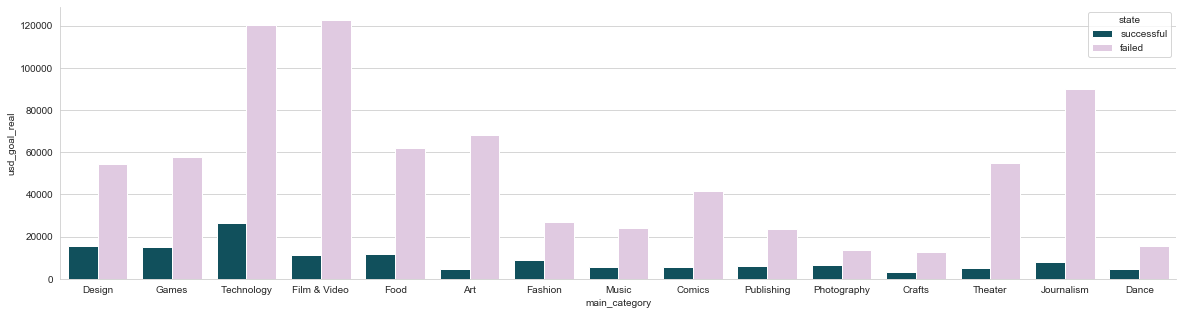

In [40]:
color = ['#055968', "#e3c6e5"]
state_compare = state_compare.sort_values('usd_pledged_real',  ascending = False)
plt.subplots(figsize = (20,5))
sns.set_style("whitegrid")
sns.barplot(x="main_category", y="usd_goal_real", hue="state", 
            data= state_compare, palette = color, ci = None)
sns.despine(right = True, top = True)

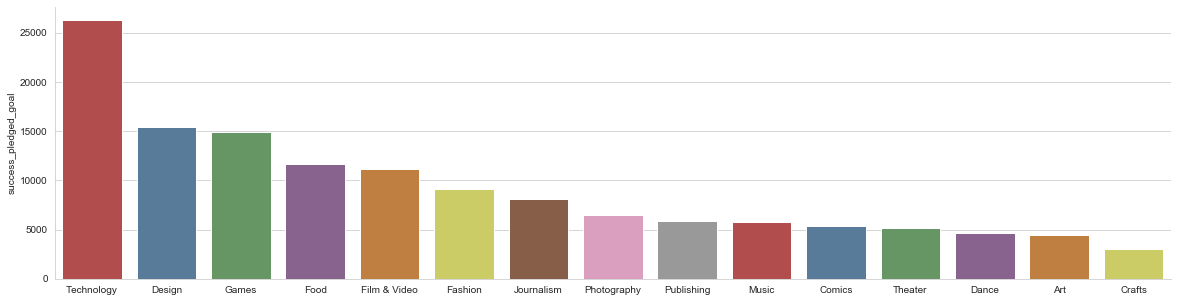

In [41]:
# pledged_sum plot
cate_df = cate_df.sort_values('success_pledged_goal',  ascending = False)
plt.subplots(figsize = (20,5))
sns.set_style("whitegrid")
sns.barplot(cate_df['success_pledged_goal'].index, y= cate_df['success_pledged_goal'] ,
            palette="Set1",saturation = 0.5)
sns.despine(right = True, top = True)

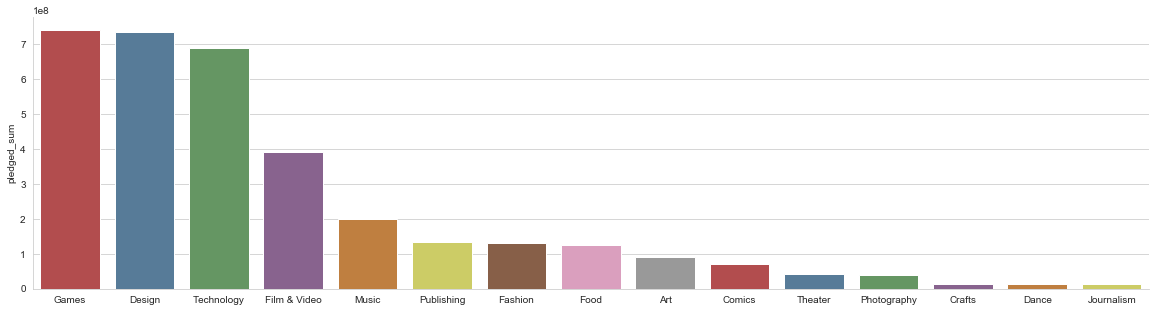

In [42]:
# pledged_sum plot
cate_df = cate_df.sort_values('pledged_sum',  ascending = False)
plt.subplots(figsize = (20,5))
sns.set_style("whitegrid")
sns.barplot(cate_df['pledged_sum'].index, y= cate_df['pledged_sum'] ,
            palette="Set1",saturation = 0.5)
sns.despine(right = True, top = True)

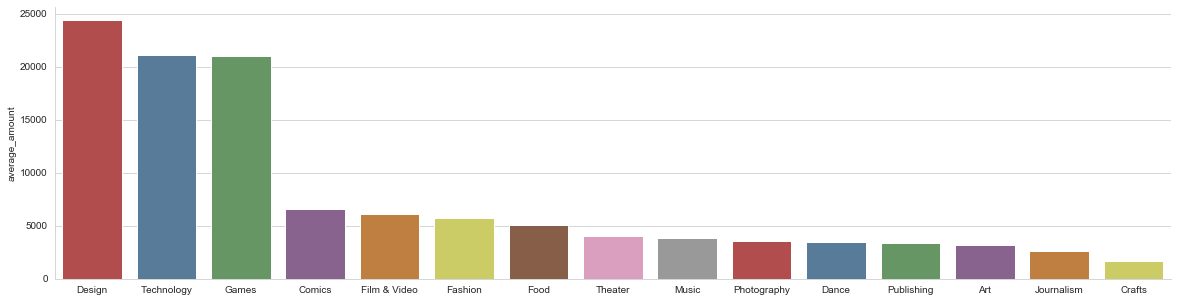

In [43]:
# avarage amount plot
cate_df = cate_df.sort_values('average_amount',  ascending = False)
plt.subplots(figsize = (20,5))
sns.set_style("whitegrid")
sns.barplot(cate_df['average_amount'].index, y= cate_df['average_amount'] ,
            palette="Set1",saturation = 0.5)
sns.despine(right = True, top = True)

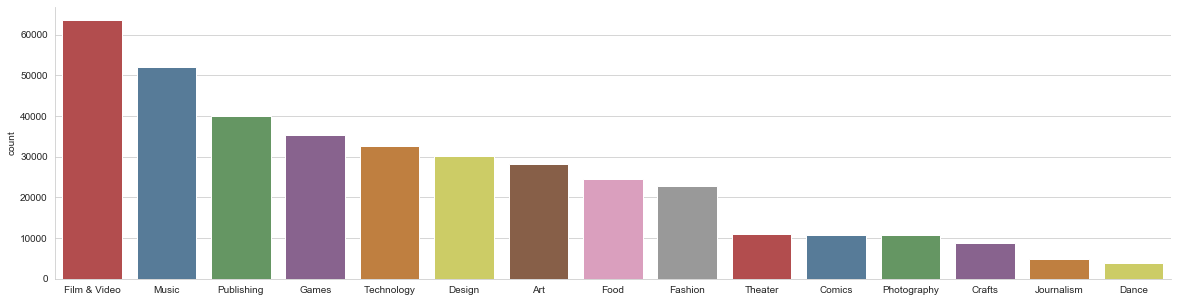

In [44]:
# count plot
cate_df = cate_df.sort_values('count',  ascending = False)
plt.subplots(figsize = (20,5))
sns.set_style("whitegrid")
sns.barplot(cate_df['count'].index, y= cate_df['count'] ,
            palette="Set1",saturation = 0.5)
sns.despine(right = True, top = True)

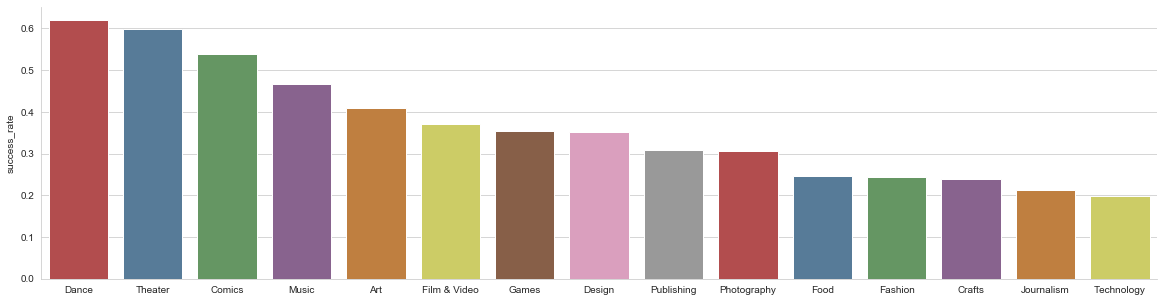

In [45]:
# success rate plot
cate_df = cate_df.sort_values('success_rate',  ascending = False)
plt.subplots(figsize = (20,5))
sns.set_style("whitegrid")
sns.barplot(cate_df['success_rate'].index, y= cate_df['success_rate'] ,
            palette="Set1",saturation = 0.5)
sns.despine(right = True, top = True)

## 4. Backers
* 4.1 Discover categories that attract most backers
* 4.2 The distribution of backers
* 4.3 Relationship between backers & pledged amounts

In [46]:
back_cate = {}

for category in set(ksdf['main_category']):
    backers = ksdf[ksdf['main_category'] == category]['backers'].sum()
    back_cate[category] = backers

backers = pd.Series(back_cate)
cate_df['backers'] = backers

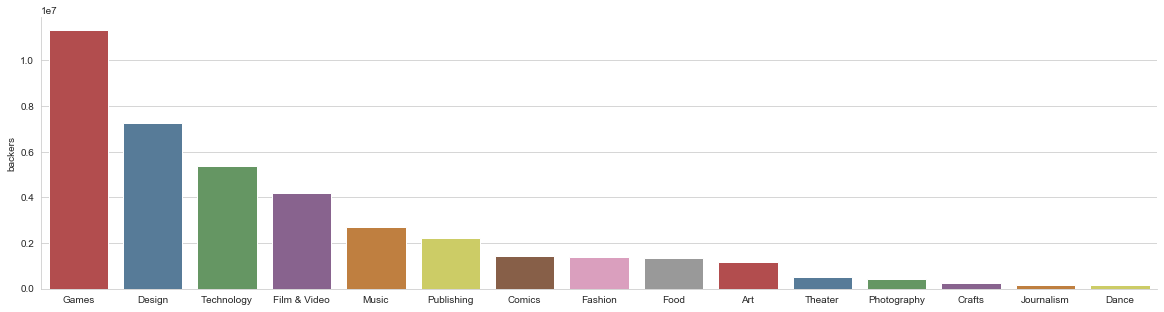

In [47]:
cate_df = cate_df.sort_values('backers',  ascending = False)
plt.subplots(figsize = (20,5))
sns.set_style("whitegrid")
sns.barplot(cate_df['backers'].index, y= cate_df['backers'] ,
            palette="Set1",saturation = 0.5)
sns.despine(right = True, top = True)

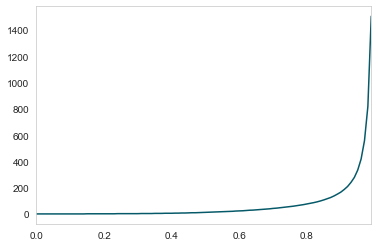

In [48]:
ksdf['backers'].quantile(list(np.arange(0,1,0.01))).plot(grid = 0, color = '#055968')

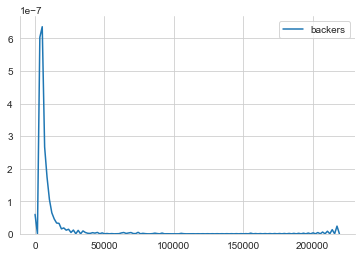

In [49]:
sns.set_style("whitegrid")
sns.kdeplot(ksdf['backers'])
sns.despine(right = True, top = True)

### 5. Modeling
* 5.1 Backers & pledged amount - `Linear Regression`
    - Use **backers** to predict **usd_pledged_real**
    - Retrieve projects that are not zero-pledged
    - Model
        - Input (X): **backers** (logarithm)
        - Output (Y): **usd_pledged_real** (logarithm)
        - Loss estimation: mean squared error
* 5.2 Project state prediction - `Random Forest`
- Data processing
    - Encode **state** column to binary:
        - successful -> 1
        - failed -> 0
        - else -> delete
    - Concatenate new data set: `ksdf_rf`
        - **main_category**
        - **time** 
        - **state**
    - Data Split:
        - train 70%
        - test 30%
    - Define X and Y
        - X:
            - category (one-hot)
            -  main_category (one-hot)
            - time
        - Y:
            - success/ failed (1/0)

In [50]:
# Select not zero-pledged projects
non_zero = ksdf[ksdf['usd_pledged_real'] != 0]
print (non_zero.shape)

(326134, 18)


In [51]:
# Define X and Y
X = ksdf[ksdf['usd_pledged_real'] != 0]['backers'].values
Y = ksdf[ksdf['usd_pledged_real'] != 0]['usd_pledged_real'].values

print (X.shape)
print (Y.shape)

(326134,)
(326134,)


In [52]:
X = X.reshape(326134,1)
Y = Y.reshape(326134,1)

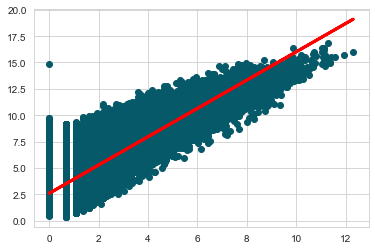

In [53]:
# Model fitting and visualization
regr = linear_model.LinearRegression()
regr.fit(np.log(X+1), np.log(Y+1))

plt.scatter(np.log(X+1), np.log(Y+1), color = '#055968')
plt.plot(np.log(X+1), regr.predict(np.log(X+1)), color='red', linewidth=3)
plt.show()

In [54]:
# Results: error and parameters

Y_pred = regr.predict(np.log(X+1))
Y_true = np.log(Y+1)

print ("error = ", sklearn.metrics.mean_squared_error(Y_true, Y_pred))
print ("coefficient = ", regr.coef_)
print ("intercept = ", regr.intercept_)

error =  1.3270311693968837
coefficient =  [[1.34211282]]
intercept =  [2.59033815]


Encode **state** column to binary
* successful -> 1
* failed -> 0
* else -> delete

In [55]:
print (ksdf['state'].value_counts())
print ('')
print ("ksdf.shape = ", ksdf.shape)

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

ksdf.shape =  (378661, 18)


In [56]:
def state_change(cell_value):
    if cell_value == 'successful':
        return 1
    
    elif cell_value == 'failed':
        return 0
    
    else:
        return 'del'

In [57]:
ksdf['state'] = ksdf['state'].apply(state_change)
print (ksdf[ksdf['state'] == 1].shape)
print (ksdf[ksdf['state'] == 0].shape)
print (ksdf[ksdf['state'] == 'del'].shape)
print (ksdf[ksdf['state'] == 1].shape[0] + ksdf[ksdf['state'] == 0].shape[0])

(133956, 18)
(197719, 18)
(46986, 18)
331675


Concatenate new DataFrame
* **main_category**
* **time** 
* **state**

In [58]:
ksdf_rf = ksdf.drop(ksdf[ksdf['state'] == 'del'].index)
print (ksdf_rf.shape)

(331675, 18)


In [59]:
ksdf_rf = pd.concat([
                  ksdf_rf['main_category'],
                  ksdf_rf['time'],
                  ksdf_rf['state']], axis = 1
                 )

print (ksdf_rf.shape)

(331675, 3)


Data Split:
* Train: 70%
* Test: 30%

In [60]:
train, test = sklearn.model_selection.train_test_split(ksdf_rf, test_size = 0.3, random_state = 42)

print ("Train shape = ", train.shape, ",", len(train)/ len(ksdf_rf) * 100, "%")
print ("Test shape = ", test.shape, ",", len(test)/ len(ksdf_rf) * 100, "%")

Train shape =  (232172, 3) , 69.99984925001884 %
Test shape =  (99503, 3) , 30.00015074998116 %


Define X and Y

In [61]:
X_train = pd.concat(
    [
     pd.get_dummies(train['main_category'], prefix = 'main_category'),
     train["time"]
    ], axis=1)

Y_train = train['state']

X_test = pd.concat(
    [
     pd.get_dummies(test['main_category'], prefix = 'main_category'),
     test["time"]
    ], axis=1)

Y_test = test['state']

In [62]:
X_train = X_train.astype(int)
Y_train = Y_train.astype(int)
X_test = X_test.astype(int)
Y_test = Y_test.astype(int)

Random Forest

In [63]:
for_record = {
    'baseline':{},
    'best_random1':{},
    'best_random2':{},
    'best_random3':{},
    'grid1':{},
    'grid2':{}
}

In [64]:
start = time.time()
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, Y_train)
end = time.time()
sec = end - start
Y_pred = rf.predict(X_train)

/Users/Terry/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [65]:
for_record['baseline']['params'] = rf.get_params()
for_record['baseline']['time'] = sec
for_record['baseline']["train_score"] = rf.score(X_train, Y_train)
for_record['baseline']['f1'] = f1_score(Y_train, Y_pred, average = 'weighted')
for_record['baseline']['test_score'] = rf.score(X_test, Y_test)

In [66]:
print (for_record['baseline']['params'])
print (for_record['baseline']['f1'])
print (for_record['baseline']['test_score'])

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
0.6037000108976848
0.6272574696240314
